# Used Car Price Regression - Feature Engineering Pipeline

A partire da questo dataset, https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset 
costruire una pipeline di feature engineering per poi supportare il training di un modello di regressione per il prezzo dell'auto nel mercato dell'usato. Evidenzia in maniera chiara l'effetto che ha la feature engineering nelle metriche di efficacia del modello.


[Qui](https://www.kaggle.com/code/mohamedhazem346/car-price-prediction/notebook) un esempio di notebook sullo stesso task. Non usatelo per copiare :slightly_smiling_face: ma in caso dopo l'esercizio per vedere cosa fa un esperto


1. handling missing value
2. sclaing features
3. handling outliers
4. polynomial features
5. feature selection
6. encoding categorical variables
7. binning
8. dimensionality reduction

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for feature engineering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, f_regression, RFE, SelectFromModel
from sklearn.decomposition import PCA

#for pipeline creation
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# For modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import shap

# Configure visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid")


In [2]:

# 1. Data Loading and Exploration
# ------------------------------
# Load the dataset (uncomment and modify path as needed)
cars = pd.read_csv('used_cars.csv')
#/kaggle/input/car-price/CarPrice_Assignment.csv

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [3]:
cars.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


Missing values per column:
brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64


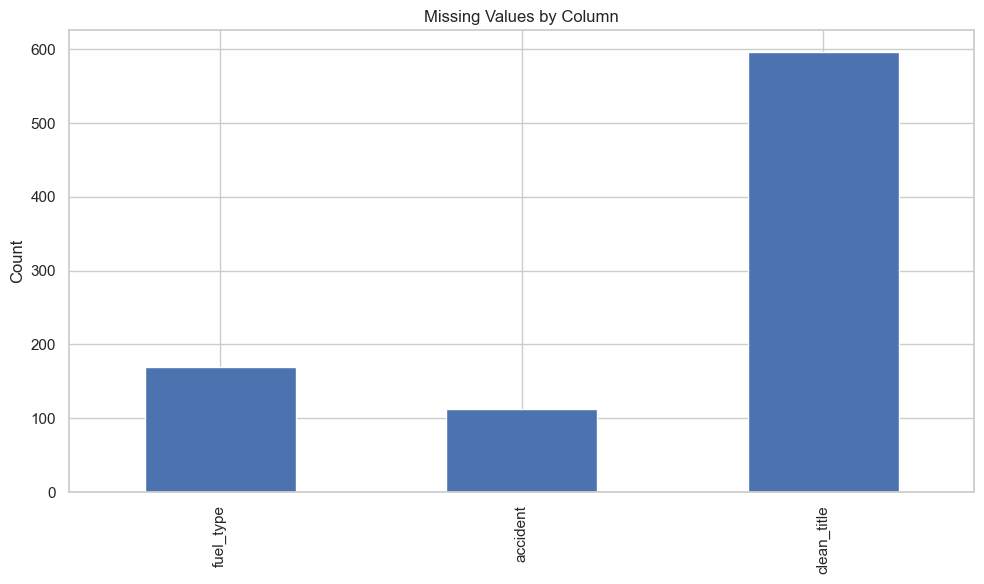

In [4]:
# Check for missing values
missing_values = cars.isnull().sum()
print(f"Missing values per column:\n{missing_values}")

# Visualize missing values
plt.figure(figsize=(10, 6))
missing_values[missing_values > 0].plot(kind='bar')
plt.title('Missing Values by Column')
plt.ylabel('Count')
plt.tight_layout()

fuel_type, accident,clean_title Type: object


**just one numerical data without missing values**

In [5]:
cars.describe() 

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [7]:
categorical_columns = ['fuel_type','brand','model','milage','engine','transmission','ext_col','int_col','accident','clean_title','price']

for col in categorical_columns:
    
    print(f"Category in {col} is : {cars[col].unique()}\n")

Category in fuel_type is : ['E85 Flex Fuel' 'Gasoline' 'Hybrid' nan 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']

Category in brand is : ['Ford' 'Hyundai' 'Lexus' 'INFINITI' 'Audi' 'Acura' 'BMW' 'Tesla' 'Land'
 'Aston' 'Toyota' 'Lincoln' 'Jaguar' 'Mercedes-Benz' 'Dodge' 'Nissan'
 'Genesis' 'Chevrolet' 'Kia' 'Jeep' 'Bentley' 'Honda' 'Lucid' 'MINI'
 'Porsche' 'Hummer' 'Chrysler' 'Volvo' 'Cadillac' 'Lamborghini' 'Maserati'
 'Volkswagen' 'Subaru' 'Rivian' 'GMC' 'RAM' 'Alfa' 'Ferrari' 'Scion'
 'Mitsubishi' 'Mazda' 'Saturn' 'Bugatti' 'Polestar' 'Rolls-Royce'
 'McLaren' 'Buick' 'Lotus' 'Pontiac' 'FIAT' 'Karma' 'Saab' 'Mercury'
 'Plymouth' 'smart' 'Maybach' 'Suzuki']

Category in model is : ['Utility Police Interceptor Base' 'Palisade SEL' 'RX 350 RX 350' ...
 'Martin DB7 Vantage Volante' 'Impala 2LZ' 'Taycan']

Category in milage is : ['51,000 mi.' '34,742 mi.' '22,372 mi.' ... '53,705 mi.' '714 mi.'
 '2,116 mi.']

Category in engine is : ['300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capabil

In [8]:
df=cars.copy()

In [9]:
#I can convert some value to numeric to visualize more info
df['price_numeric'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float) #to float!

df['mileage_numeric'] = df['milage'].str.replace(' mi.','').str.replace(',', '').astype(float)
df['log_mileage'] = np.log1p(df['mileage_numeric'])

# Create vehicle age feature
current_year = 2025
df['vehicle_age'] = current_year - df['model_year']

# Create mileage per year feature
df['miles_per_year'] = df['mileage_numeric'] / df['vehicle_age']
df['age_squared'] = df['vehicle_age'] ** 2
df['log_age'] = np.log1p(df['vehicle_age'])  # log1p handles zero values

# Interactions between key predictors
df['mileage_age_interaction'] = df['mileage_numeric'] * df['vehicle_age']

df.info()
#fillna(numeric_df.median()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   brand                    4009 non-null   object 
 1   model                    4009 non-null   object 
 2   model_year               4009 non-null   int64  
 3   milage                   4009 non-null   object 
 4   fuel_type                3839 non-null   object 
 5   engine                   4009 non-null   object 
 6   transmission             4009 non-null   object 
 7   ext_col                  4009 non-null   object 
 8   int_col                  4009 non-null   object 
 9   accident                 3896 non-null   object 
 10  clean_title              3413 non-null   object 
 11  price                    4009 non-null   object 
 12  price_numeric            4009 non-null   float64
 13  mileage_numeric          4009 non-null   float64
 14  log_mileage             

In [10]:
# Handle missing values
df['fuel_type_filled'] = df['fuel_type'].fillna('Unknown')
df['has_accident'] = df['accident'].apply(lambda x: 1 if x == 'At least 1 accident or damage reported' else 0)
df['has_clean_title'] = df['clean_title'].apply(lambda x: 1 if x == 'Yes' else 0 if pd.isna(x) else np.nan)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   brand                    4009 non-null   object 
 1   model                    4009 non-null   object 
 2   model_year               4009 non-null   int64  
 3   milage                   4009 non-null   object 
 4   fuel_type                3839 non-null   object 
 5   engine                   4009 non-null   object 
 6   transmission             4009 non-null   object 
 7   ext_col                  4009 non-null   object 
 8   int_col                  4009 non-null   object 
 9   accident                 3896 non-null   object 
 10  clean_title              3413 non-null   object 
 11  price                    4009 non-null   object 
 12  price_numeric            4009 non-null   float64
 13  mileage_numeric          4009 non-null   float64
 14  log_mileage             

# Extract Information from Engine Column

In [12]:
df['horsepower'] = df['engine'].str.extract('(\d+\.?\d*)HP').astype(float) #in HP cavalli
df['engine_size'] = df['engine'].str.extract('(\d+\.?\d*)L').astype(float) #in litri 

In [13]:
# Extract engine type
def get_engine_type(engine_str):
    if pd.isna(engine_str):
        return 'Unknown'
    if 'V6' in engine_str:
        return 'V6'
    elif 'V8' in engine_str:
        return 'V8'
    elif '12 Cylinder' in engine_str:
        return 'V12'
    elif '4 Cylinder' in engine_str:
        return '4 Cylinder'
    elif 'DOHC' in engine_str:
        return 'DOHC'
    else:
        return 'Other'
        
df['engine_type'] = df['engine'].apply(get_engine_type)

In [14]:
# Create binary features for special capabilities
df['is_flex_fuel'] = df['engine'].apply(lambda x: 1 if isinstance(x, str) and 'Flex Fuel' in x else 0)

# Create additional potential features
df['price_per_hp'] = df['price_numeric'] / df['horsepower'].replace(0, 1)
df['hp_per_liter'] = df['horsepower'] / df['engine_size']  # Performance metric

#df.head()

## Extract information from Transmission Data

In [15]:
# Simplify transmission types
def simplify_transmission(trans_str):
    if pd.isna(trans_str):
        return 'Unknown'
    if any(x in trans_str for x in ['A/T', 'Automatic', 'Auto']):
        return 'Automatic'
    elif any(x in trans_str for x in ['M/T', 'Manual']):
        return 'Manual'
    elif 'CVT' in trans_str:
        return 'CVT'
    else:
        return 'Other'

df['transmission_type'] = df['transmission'].apply(simplify_transmission)

# Extract number of speeds
df['transmission_speeds'] = df['transmission'].str.extract('(\d+)[-\s]Speed')
df['transmission_speeds'] = pd.to_numeric(df['transmission_speeds'], errors='coerce')
#df.tail()

## Categorical Features

In [16]:
# Group similar colors
#create a faction to use it on int_col and ext_col

def simplify_color(color_str):
    if pd.isna(color_str):
        return 'Unknown'
    
    colors = ['Black', 'White', 'Gray', 'Silver', 'Blue', 'Red', 'Green', 'Yellow', 'Brown', 'Orange', 'Purple', 'Gold']    
    for variation_colors in colors:
        if variation_colors.lower() in color_str.lower():
            return variation_colors
    return 'Other'


In [17]:
df['ext_color_simple'] = df['ext_col'].apply(simplify_color)
df['int_color_simple'] = df['int_col'].apply(simplify_color)

In [18]:
#divide cars into luxury 1, not luxury 0
lux_car = ['BMW', 'Audi', 'Mercedes-Benz', 'Porsche', 'Tesla', 'Rolls-Royce', 'Aston', 'Bentley', 'Lamborghini', 'Ferrari', 'Maserati']
df['luxury'] = df['brand'].apply(lambda x: 1 if x in lux_car else 0)

# Create interaction terms
df['luxury_age'] = df['luxury'] * df['vehicle_age']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   brand                    4009 non-null   object 
 1   model                    4009 non-null   object 
 2   model_year               4009 non-null   int64  
 3   milage                   4009 non-null   object 
 4   fuel_type                3839 non-null   object 
 5   engine                   4009 non-null   object 
 6   transmission             4009 non-null   object 
 7   ext_col                  4009 non-null   object 
 8   int_col                  4009 non-null   object 
 9   accident                 3896 non-null   object 
 10  clean_title              3413 non-null   object 
 11  price                    4009 non-null   object 
 12  price_numeric            4009 non-null   float64
 13  mileage_numeric          4009 non-null   float64
 14  log_mileage             

In [20]:
categorical_columns = ['price_numeric','miles_per_year', 'is_flex_fuel', 'transmission_type', 'transmission_speeds','model','engine','ext_color_simple',
                       'int_color_simple','accident','clean_title','price','luxury','transmission_speeds','horsepower', 'mileage_numeric', 'has_accident',
                       'has_clean_title', 'vehicle_age', 'miles_per_year']

for col in categorical_columns:
    
    print(f"Category in {col} is : {df[col].unique()}\n")

Category in price_numeric is : [ 10300.  38005.  54598. ...  59335. 349950.  90998.]

Category in miles_per_year is : [4250.         8685.5        7457.33333333 ...  357.         3633.33333333
  705.33333333]

Category in is_flex_fuel is : [1 0]

Category in transmission_type is : ['Automatic' 'Other' 'Manual' 'CVT']

Category in transmission_speeds is : [ 6.  8. nan  7.  9. 10.  5.  1.  4.  2.]

Category in model is : ['Utility Police Interceptor Base' 'Palisade SEL' 'RX 350 RX 350' ...
 'Martin DB7 Vantage Volante' 'Impala 2LZ' 'Taycan']

Category in engine is : ['300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability'
 '3.8L V6 24V GDI DOHC' '3.5 Liter DOHC' ...
 '136.0HP 1.8L 4 Cylinder Engine Gasoline Fuel'
 '270.0HP 2.0L 4 Cylinder Engine Gasoline Fuel'
 '420.0HP 5.9L 12 Cylinder Engine Gasoline Fuel']

Category in ext_color_simple is : ['Black' 'Other' 'Blue' 'White' 'Silver' 'Green' 'Yellow' 'Gray' 'Purple'
 'Red' 'Gold' 'Orange' 'Brown']

Category in int_color_simple is : ['Blac

# VISUALIZE DATA AND TRANSFORMATION

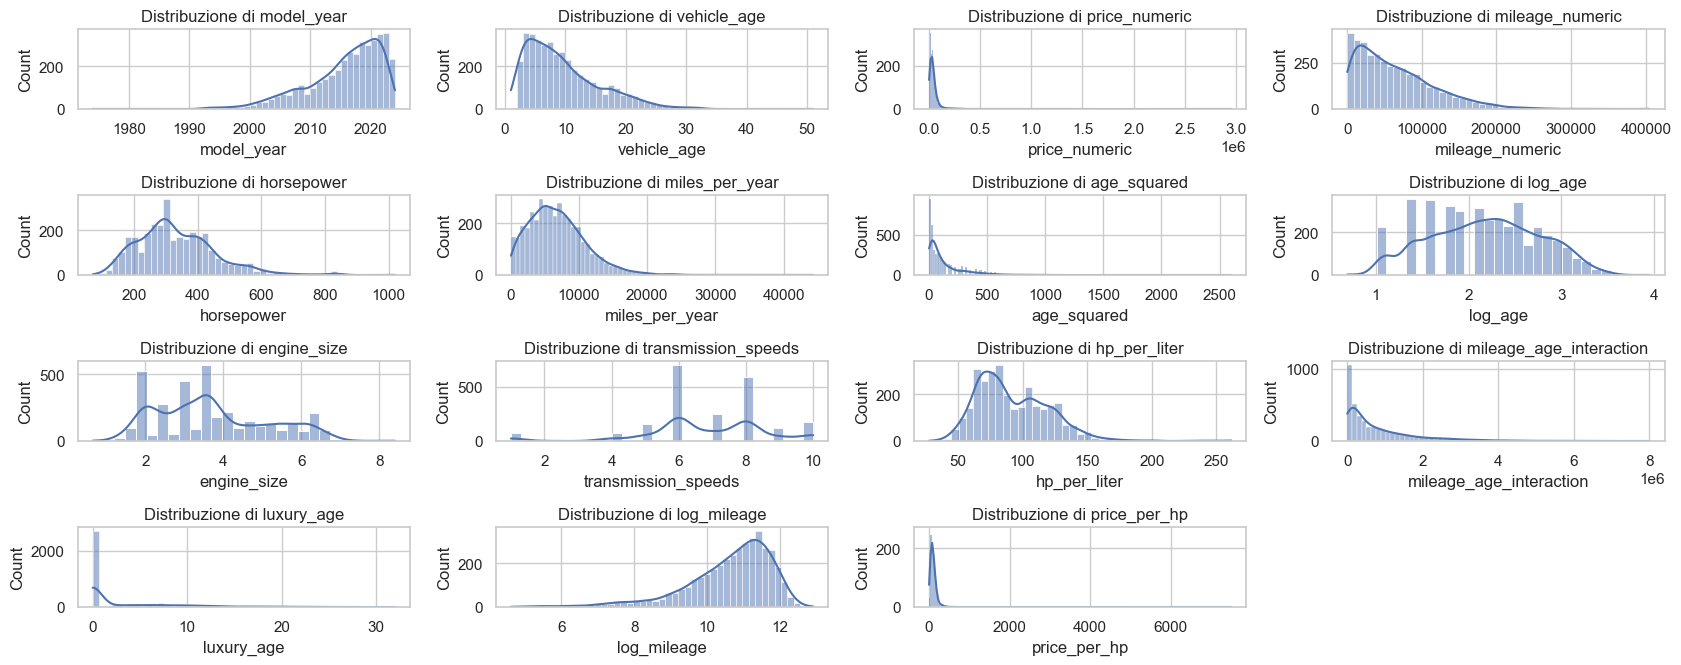

In [21]:
plt.figure(figsize=(17, 8))
numeric_cols = ['model_year','vehicle_age', 'price_numeric', 'mileage_numeric',  'horsepower', 'miles_per_year', 'age_squared','log_age','engine_size','transmission_speeds','hp_per_liter','mileage_age_interaction', 'luxury_age','log_mileage','price_per_hp']
numeric_cols = [col for col in numeric_cols if col in df.columns]

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribuzione di {col}')
plt.tight_layout()
plt.show()


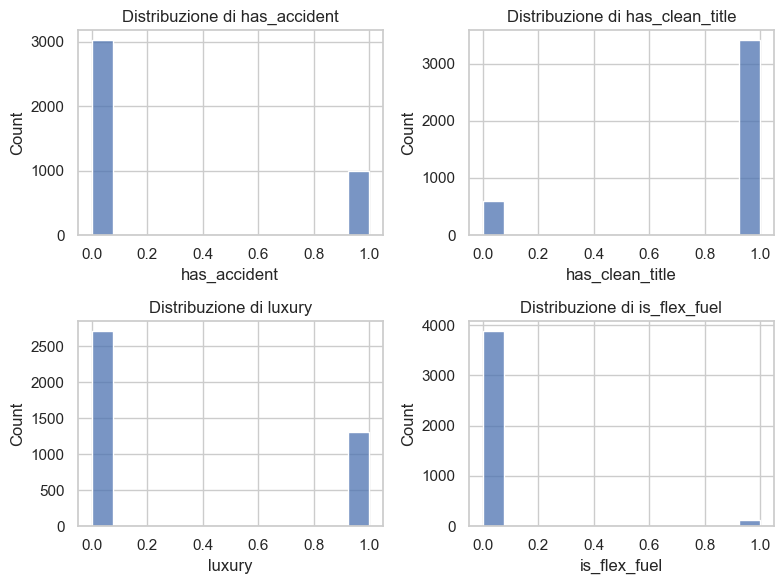

In [22]:
plt.figure(figsize=(8, 6))
binary_cols = ['has_accident','has_clean_title','luxury','is_flex_fuel']
binary_cols = [col for col in binary_cols if col in df.columns]
for i, col in enumerate(binary_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col].dropna())
    plt.title(f'Distribuzione di {col}')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

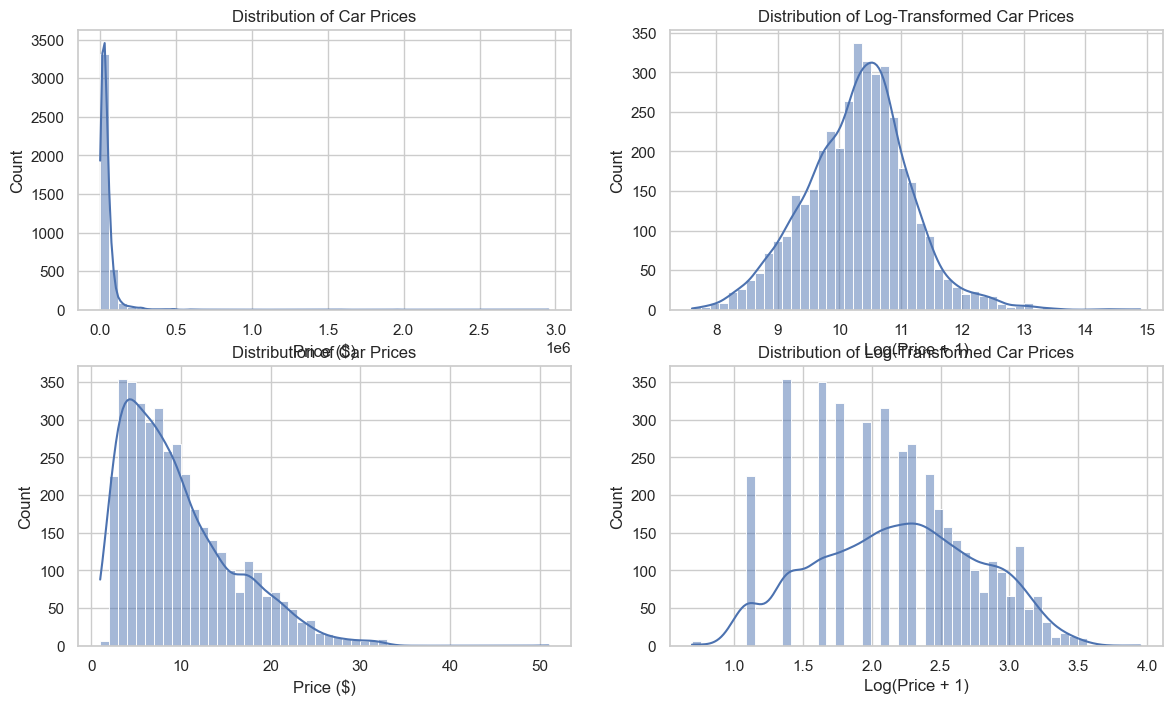

In [23]:
# 1. Distribution of Prices
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['price_numeric'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.histplot(np.log1p(df['price_numeric']), bins=50, kde=True)
plt.title('Distribution of Log-Transformed Car Prices')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.histplot(df['vehicle_age'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
sns.histplot(df['log_age'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Car Prices')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Count')

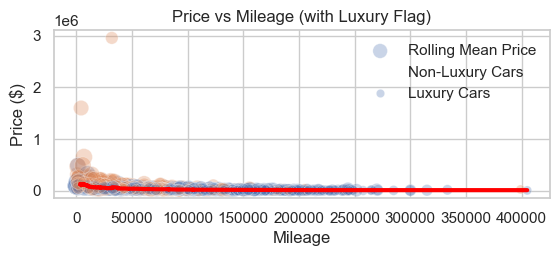

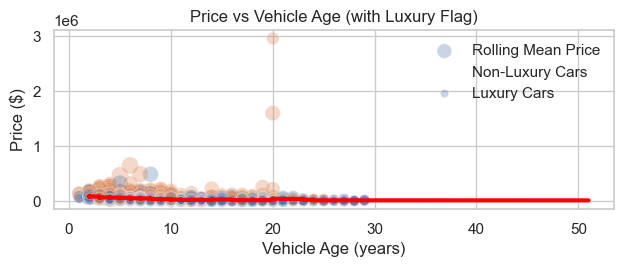

In [24]:
# 2. Price vs Mileage with Rolling Mean
plt.subplot(2, 1, 1)
sns.scatterplot(x='mileage_numeric', y='price_numeric', data=df, alpha=0.3, size='horsepower', sizes=(20, 200), hue='luxury')
plt.title('Price vs Mileage (with Luxury Flag)')
plt.xlabel('Mileage')
plt.ylabel('Price ($)')

# Calculate and plot rolling mean
df_sorted = df.sort_values('mileage_numeric')
df_sorted['rolling_mean_price'] = df_sorted['price_numeric'].rolling(window=200).mean()
plt.plot(df_sorted['mileage_numeric'], df_sorted['rolling_mean_price'], color='red', linewidth=3)
plt.legend(['Rolling Mean Price', 'Non-Luxury Cars', 'Luxury Cars'])
plt.show()

# 3. Price vs Vehicle Age with Rolling Mean
plt.subplot(2, 1, 2)
sns.scatterplot(x='vehicle_age', y='price_numeric', data=df, alpha=0.3, size='horsepower', sizes=(20, 200), hue='luxury')
plt.title('Price vs Vehicle Age (with Luxury Flag)')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Price ($)')

# Calculate and plot rolling mean
df_sorted = df.sort_values('vehicle_age')
df_sorted['rolling_mean_price'] = df_sorted['price_numeric'].rolling(window=200).mean()
plt.plot(df_sorted['vehicle_age'], df_sorted['rolling_mean_price'], color='red', linewidth=3)
plt.legend(['Rolling Mean Price', 'Non-Luxury Cars', 'Luxury Cars'])

plt.tight_layout()
plt.show()

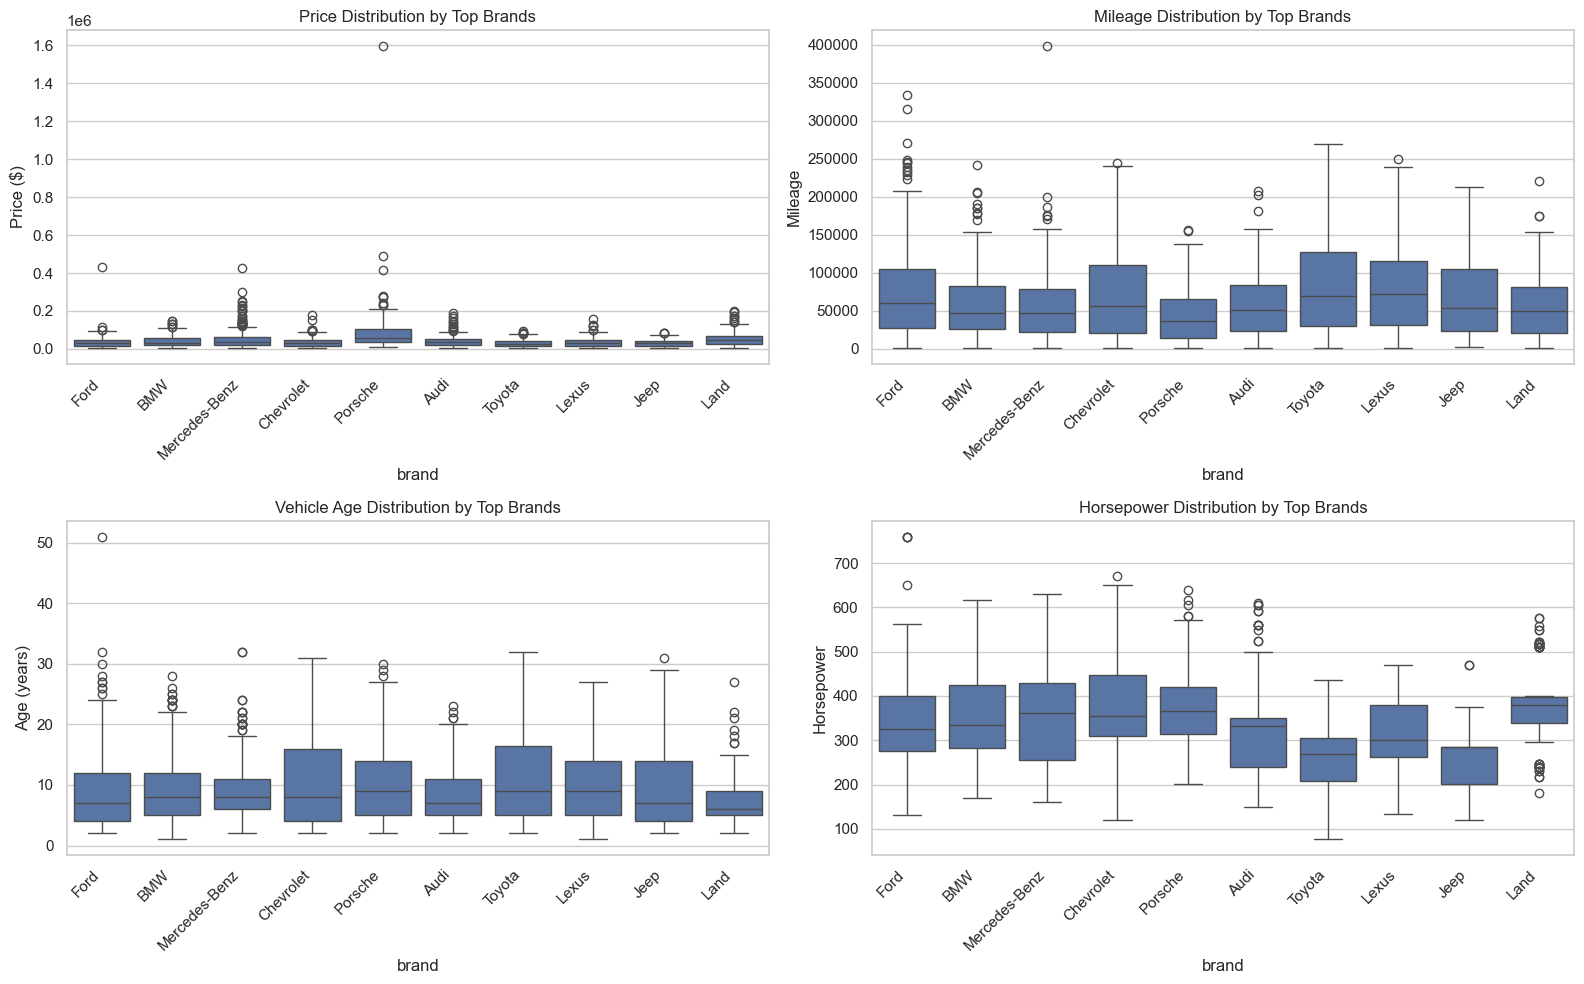

In [25]:
# 4. Cross-effects: Mileage, Age, and Price by Brand Category
plt.figure(figsize=(16, 10))

top_brands = df['brand'].value_counts().head(10).index.tolist()
df_top_brands = df[df['brand'].isin(top_brands)]

plt.subplot(2, 2, 1)
sns.boxplot(x='brand', y='price_numeric', data=df_top_brands, order=top_brands)
plt.title('Price Distribution by Top Brands')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Price ($)')

plt.subplot(2, 2, 2)
sns.boxplot(x='brand', y='mileage_numeric', data=df_top_brands, order=top_brands)
plt.title('Mileage Distribution by Top Brands')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mileage')

plt.subplot(2, 2, 3)
sns.boxplot(x='brand', y='vehicle_age', data=df_top_brands, order=top_brands)
plt.title('Vehicle Age Distribution by Top Brands')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Age (years)')

plt.subplot(2, 2, 4)
sns.boxplot(x='brand', y='horsepower', data=df_top_brands, order=top_brands)
plt.title('Horsepower Distribution by Top Brands')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Horsepower')

plt.tight_layout()
plt.show()

In [26]:
#df.info()

In [27]:
numeric_columns = ['price_numeric', 'log_mileage', 'horsepower', 'luxury', 'has_accident', 'has_clean_title', 'log_age',
                 'transmission_speeds','hp_per_liter', 'mileage_age_interaction', 'luxury_age', 'engine_size', 'is_flex_fuel',
                 'model_year', 'mileage_numeric',  'miles_per_year', 'price_per_hp']


Highly correlated features: {'price_per_hp', 'model_year', 'mileage_numeric', 'mileage_age_interaction', 'luxury_age'}


<Figure size 1400x1200 with 0 Axes>

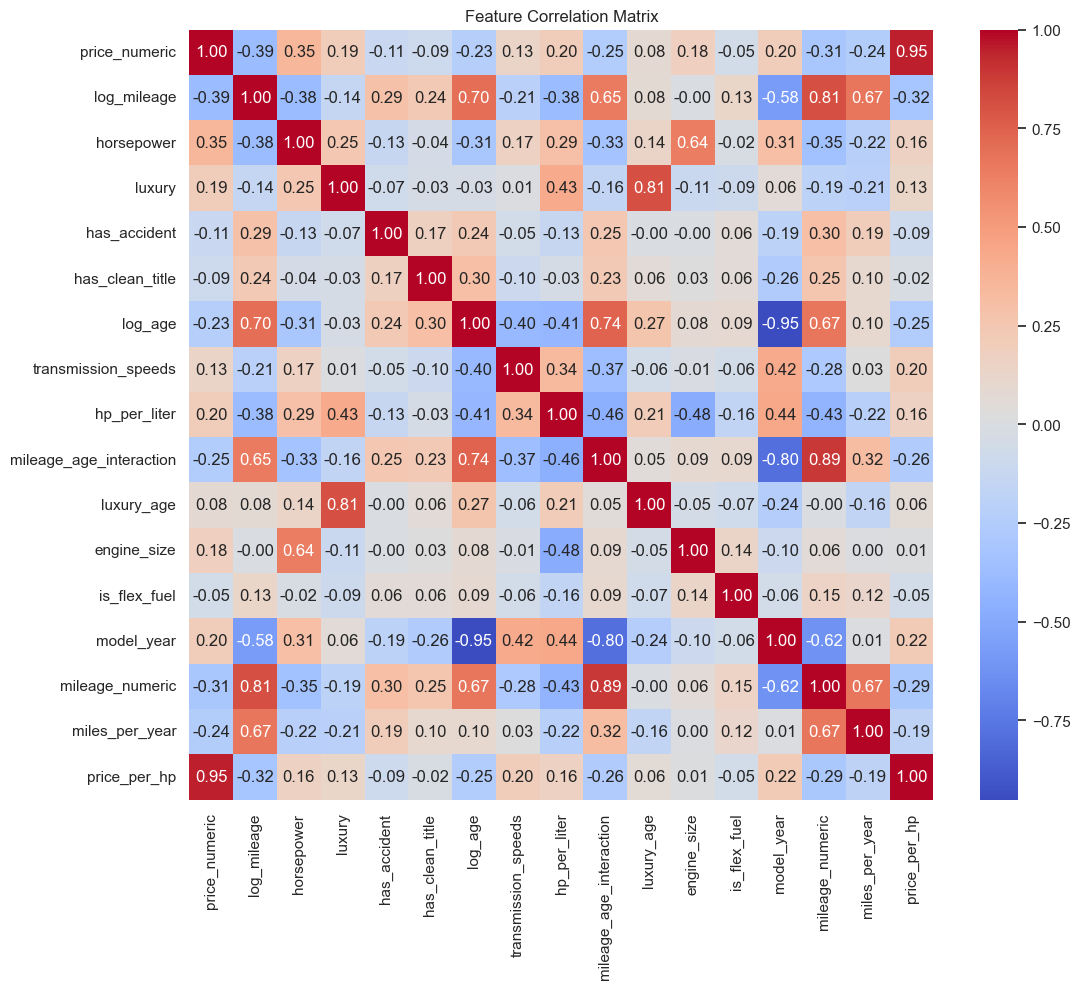

In [28]:
# 6. Feature correlations with price
plt.figure(figsize=(14, 12))

# Prepare data for correlation analysis
numeric_df = df[['price_numeric', 'log_mileage', 'horsepower', 'luxury', 'has_accident', 'has_clean_title', 'log_age',
                 'transmission_speeds','hp_per_liter', 'mileage_age_interaction', 'luxury_age', 'engine_size', 'is_flex_fuel',
                 'model_year', 'mileage_numeric',  'miles_per_year', 'price_per_hp']].copy()

numeric_df = numeric_df.fillna(numeric_df.median()) 


correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.savefig('correlation_matrix.png')

# Filter features with high correlation (e.g., >0.7)
threshold = 0.7
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print(f"Highly correlated features: {highly_correlated_features}")


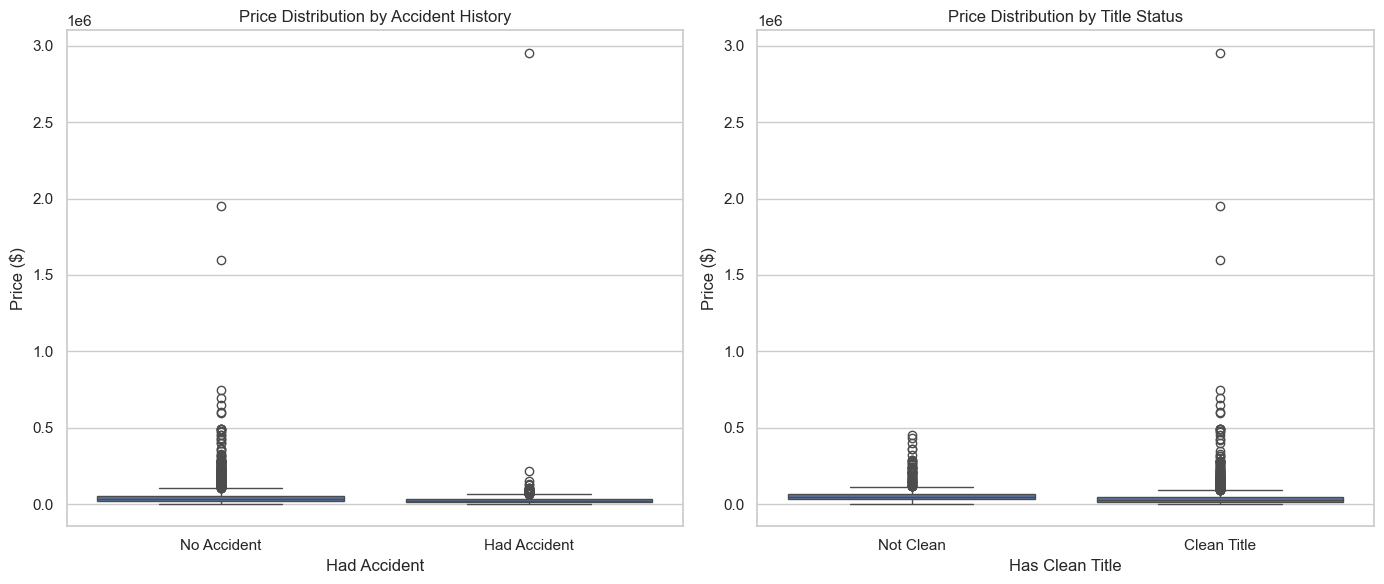

In [29]:
# 7. Accident and Title Effect on Price
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='has_accident', y='price_numeric', data=df)
plt.title('Price Distribution by Accident History')
plt.xlabel('Had Accident')
plt.ylabel('Price ($)')
plt.xticks([0, 1], ['No Accident', 'Had Accident'])

plt.subplot(1, 2, 2)
sns.boxplot(x='has_clean_title', y='price_numeric', data=df)
plt.title('Price Distribution by Title Status')
plt.xlabel('Has Clean Title')
plt.ylabel('Price ($)')
plt.xticks([0, 1], ['Not Clean', 'Clean Title'])

plt.tight_layout()
plt.show()

# I think could be interesting valuate this therms based on vehicle_age and horse_power

In [30]:
categorical_columns = ['price_numeric','miles_per_year', 'is_flex_fuel', 'transmission_type', 'transmission_speeds','model',
                       'engine','ext_color_simple', 'int_color_simple','accident','clean_title','price','luxury','transmission_speeds',
                       'horsepower', 'mileage_numeric', 'has_accident','has_clean_title', 'vehicle_age', 'miles_per_year']

for col in categorical_columns:
    
    print(f"Category in {col} is : {df[col].unique()}\n")

Category in price_numeric is : [ 10300.  38005.  54598. ...  59335. 349950.  90998.]

Category in miles_per_year is : [4250.         8685.5        7457.33333333 ...  357.         3633.33333333
  705.33333333]

Category in is_flex_fuel is : [1 0]

Category in transmission_type is : ['Automatic' 'Other' 'Manual' 'CVT']

Category in transmission_speeds is : [ 6.  8. nan  7.  9. 10.  5.  1.  4.  2.]

Category in model is : ['Utility Police Interceptor Base' 'Palisade SEL' 'RX 350 RX 350' ...
 'Martin DB7 Vantage Volante' 'Impala 2LZ' 'Taycan']

Category in engine is : ['300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability'
 '3.8L V6 24V GDI DOHC' '3.5 Liter DOHC' ...
 '136.0HP 1.8L 4 Cylinder Engine Gasoline Fuel'
 '270.0HP 2.0L 4 Cylinder Engine Gasoline Fuel'
 '420.0HP 5.9L 12 Cylinder Engine Gasoline Fuel']

Category in ext_color_simple is : ['Black' 'Other' 'Blue' 'White' 'Silver' 'Green' 'Yellow' 'Gray' 'Purple'
 'Red' 'Gold' 'Orange' 'Brown']

Category in int_color_simple is : ['Blac

# FEATURE SELECTION

In [31]:
# Select numeric features for selection
numeric_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

#I want to exclude price numeric to evaluate it
numeric_features = [col for col in numeric_features if col != 'price_numeric']  # Exclude target

interaction_cols =['horsepower' , 'engine_size', 'price_per_hp','hp_per_liter', 'transmission_speeds']
for col in interaction_cols:
    df[col] = df[col].fillna(df[col].median())

df[numeric_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   model_year               4009 non-null   int64  
 1   mileage_numeric          4009 non-null   float64
 2   log_mileage              4009 non-null   float64
 3   vehicle_age              4009 non-null   int64  
 4   miles_per_year           4009 non-null   float64
 5   age_squared              4009 non-null   int64  
 6   log_age                  4009 non-null   float64
 7   mileage_age_interaction  4009 non-null   float64
 8   has_accident             4009 non-null   int64  
 9   has_clean_title          4009 non-null   int64  
 10  horsepower               4009 non-null   float64
 11  engine_size              4009 non-null   float64
 12  is_flex_fuel             4009 non-null   int64  
 13  price_per_hp             4009 non-null   float64
 14  hp_per_liter            

#filtered methods

# Assuming:
- X:all features
- Y: PRICE (is the target)

In [32]:
numeric_columns = ['log_mileage', 'horsepower', 'luxury', 'has_accident', 'has_clean_title', 'log_age',
                 'transmission_speeds','hp_per_liter', 'mileage_age_interaction', 'luxury_age', 'engine_size', 'is_flex_fuel',
                 'model_year', 'mileage_numeric',  'miles_per_year']

X = df[numeric_columns]  # Start with numeric features
y = df['price_numeric']  # Assuming price is your target

Top 5 features based on F-statistic:
                    Feature       Score
0               log_mileage  697.334015
13          mileage_numeric  412.553867
1                horsepower  308.639793
8   mileage_age_interaction  268.293003
14           miles_per_year  251.326283


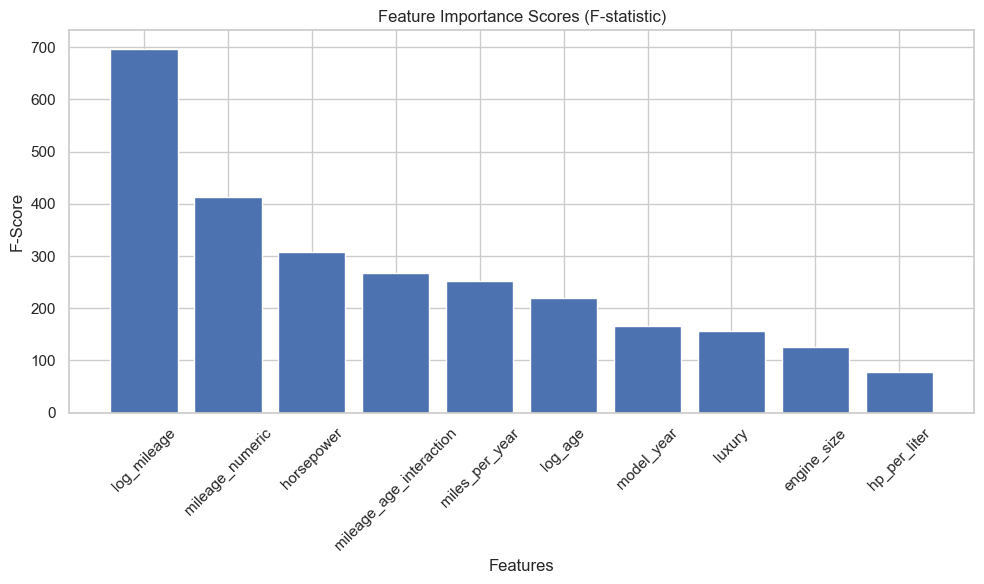

In [33]:
# 2. Univariate Feature Selection (using F-statistic)
selector = SelectKBest(score_func=f_regression, k=5)  # Select top 5 features
X_uni_selected = selector.fit_transform(X, y)
selected_features_uni = X.columns[selector.get_support()]

# Display results
scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

print("Top 5 features based on F-statistic:")
print(scores.head(5))

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(scores['Feature'].head(10), scores['Score'].head(10))
plt.title('Feature Importance Scores (F-statistic)')
plt.xlabel('Features')
plt.ylabel('F-Score')
plt.xticks(rotation=45)
plt.tight_layout()

In [34]:
# wrapper methods
#X = df[numeric_columns]  # Start with numeric features
#y = df['price_numeric']  # Assuming price is your target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=10, step=1)
# Fit RFE
X_rfe = rfe.fit(X_train, y_train)
selected_features_rfe = X.columns[rfe.support_]

print("Features selected by RFE:")
print(selected_features_rfe.tolist())

# Feature ranking (1 means selected)
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values('Ranking')

print("\nFeature ranking (1 is highest):\n")
print(feature_ranking)


Features selected by RFE:
['log_mileage', 'horsepower', 'luxury', 'transmission_speeds', 'hp_per_liter', 'mileage_age_interaction', 'luxury_age', 'engine_size', 'mileage_numeric', 'miles_per_year']

Feature ranking (1 is highest):

                    Feature  Ranking
0               log_mileage        1
1                horsepower        1
2                    luxury        1
7              hp_per_liter        1
6       transmission_speeds        1
10              engine_size        1
9                luxury_age        1
8   mileage_age_interaction        1
14           miles_per_year        1
13          mileage_numeric        1
5                   log_age        2
12               model_year        3
4           has_clean_title        4
3              has_accident        5
11             is_flex_fuel        6


Feature importance based on Lasso coefficients:
                    Feature   Coefficient
0               log_mileage -50799.092974
5                   log_age  45301.785803
13          mileage_numeric -34093.835229
14           miles_per_year  28952.411070
8   mileage_age_interaction  24431.835737
12               model_year  23890.052113
10              engine_size  19159.836607
2                    luxury  15680.159963
7              hp_per_liter   8837.178600
9                luxury_age  -5754.828420
1                horsepower  -2549.247558
6       transmission_speeds   2167.022860
4           has_clean_title  -1980.762972
11             is_flex_fuel   -966.505387
3              has_accident    198.644551


C:\Users\marti\PycharmProjects\MachineLearning_bootcamp\.env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.405e+10, tolerance: 2.483e+09
  model = cd_fast.enet_coordinate_descent(


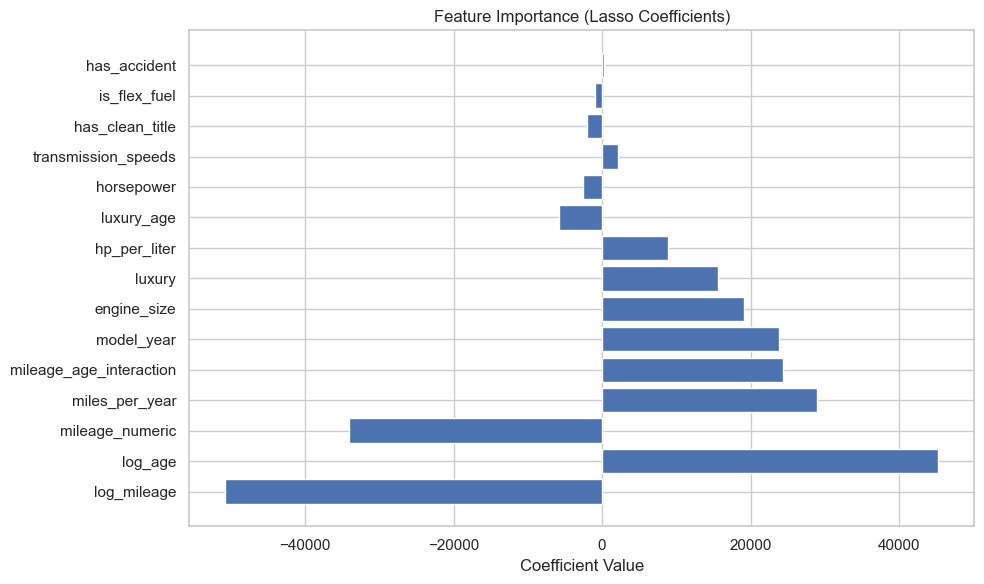

In [35]:
#embedded Methods

# 1. Lasso Regression (L1 Regularization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = Lasso(alpha=0.01)
lasso.fit(X_scaled, y)

# Get coefficients
lasso_coefs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("Feature importance based on Lasso coefficients:")
print(lasso_coefs)

selected_features_lasso = lasso_coefs.loc[np.abs(lasso_coefs.Coefficient)>0.00001,'Feature'].tolist()

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(lasso_coefs['Feature'], lasso_coefs['Coefficient'])
plt.title('Feature Importance (Lasso Coefficients)')
plt.xlabel('Coefficient Value')
plt.tight_layout()

Feature importance based on Random Forest:
                    Feature  Importance
10              engine_size    0.208755
14           miles_per_year    0.158712
7              hp_per_liter    0.142635
9                luxury_age    0.113348
8   mileage_age_interaction    0.103975
1                horsepower    0.070308
0               log_mileage    0.052469
13          mileage_numeric    0.044359
12               model_year    0.035485
5                   log_age    0.026019
2                    luxury    0.020968
6       transmission_speeds    0.010112
3              has_accident    0.009351
4           has_clean_title    0.003462
11             is_flex_fuel    0.000042

Selected features: ['hp_per_liter', 'mileage_age_interaction', 'luxury_age', 'engine_size', 'miles_per_year']
Number of selected features: 5


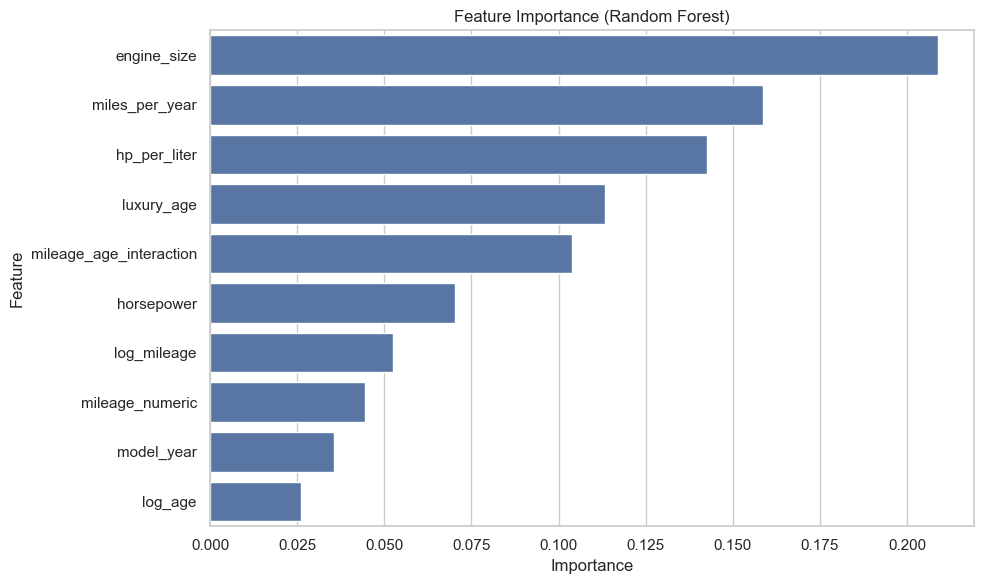

In [36]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
rf_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature importance based on Random Forest:")
print(rf_importances)

# Select features based on importance threshold
selector = SelectFromModel(rf, threshold=0.1)  # Select features with importance > 0.1
X_rf_selected = selector.fit_transform(X, y)
selected_features_rf = X.columns[selector.get_support()]

print(f"\nSelected features: {selected_features_rf.tolist()}")
print(f"Number of selected features: {len(selected_features_rf)}")

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importances.head(10))
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()

High correlation between log_mileage and mileage_numeric: 0.81
High correlation between luxury and luxury_age: 0.81
High correlation between log_age and model_year: -0.95
High correlation between mileage_age_interaction and mileage_numeric: 0.89

Features to drop due to high correlation: ['luxury_age', 'mileage_numeric', 'model_year']

Remaining features: ['log_mileage', 'horsepower', 'luxury', 'has_accident', 'has_clean_title', 'log_age', 'transmission_speeds', 'hp_per_liter', 'mileage_age_interaction', 'engine_size', 'is_flex_fuel', 'miles_per_year']


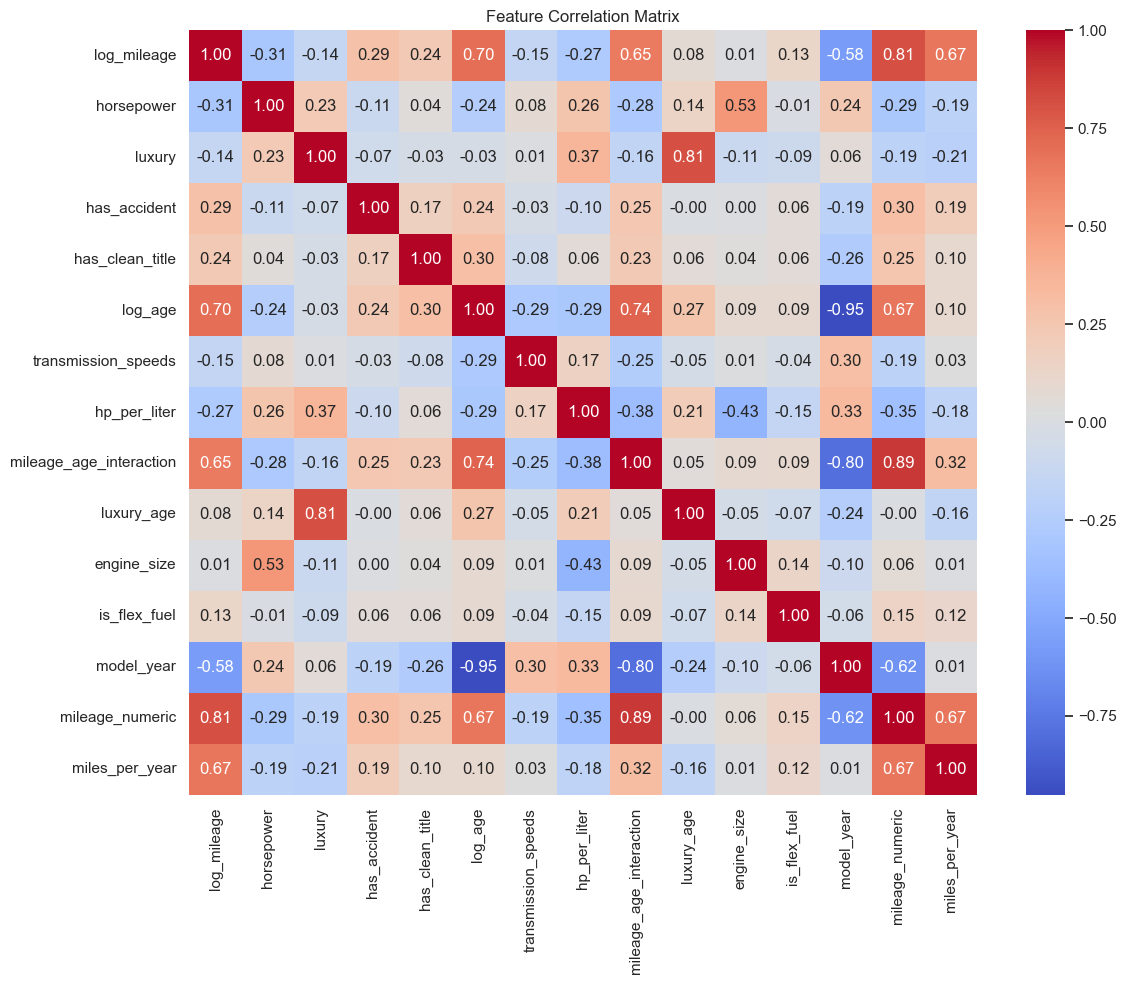

In [37]:
#Correlation-based Feature Selection
# Correlation matrix
correlation_matrix = X.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()

# Function to find highly correlated features
def identify_collinear_features(correlation_matrix, threshold=0.8):
    features = correlation_matrix.columns
    to_drop = []
    
    for i in range(len(features)):
        for j in range(i+1, len(features)):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                # If two features are highly correlated, keep one and drop the other
                print(f"High correlation between {features[i]} and {features[j]}: {correlation_matrix.iloc[i, j]:.2f}")
                to_drop.append(features[j])
    
    # Remove duplicates
    to_drop = list(set(to_drop))
    print(f"\nFeatures to drop due to high correlation: {to_drop}")
    return to_drop

features_to_drop = identify_collinear_features(correlation_matrix, 0.8)
X_reduced = X.drop(columns=features_to_drop)
print(f"\nRemaining features: {X_reduced.columns.tolist()}")


Feature selection method comparison:
                         Univariate Selection  RFE  Lasso Regression  \
mileage_age_interaction                     1    1                 1   
miles_per_year                              1    1                 1   
log_mileage                                 1    1                 1   
hp_per_liter                                0    1                 1   
luxury_age                                  0    1                 1   
horsepower                                  1    1                 1   
engine_size                                 0    1                 1   
mileage_numeric                             1    1                 1   
luxury                                      0    1                 1   
transmission_speeds                         0    1                 1   
has_accident                                0    0                 1   
log_age                                     0    0                 1   
has_clean_title            

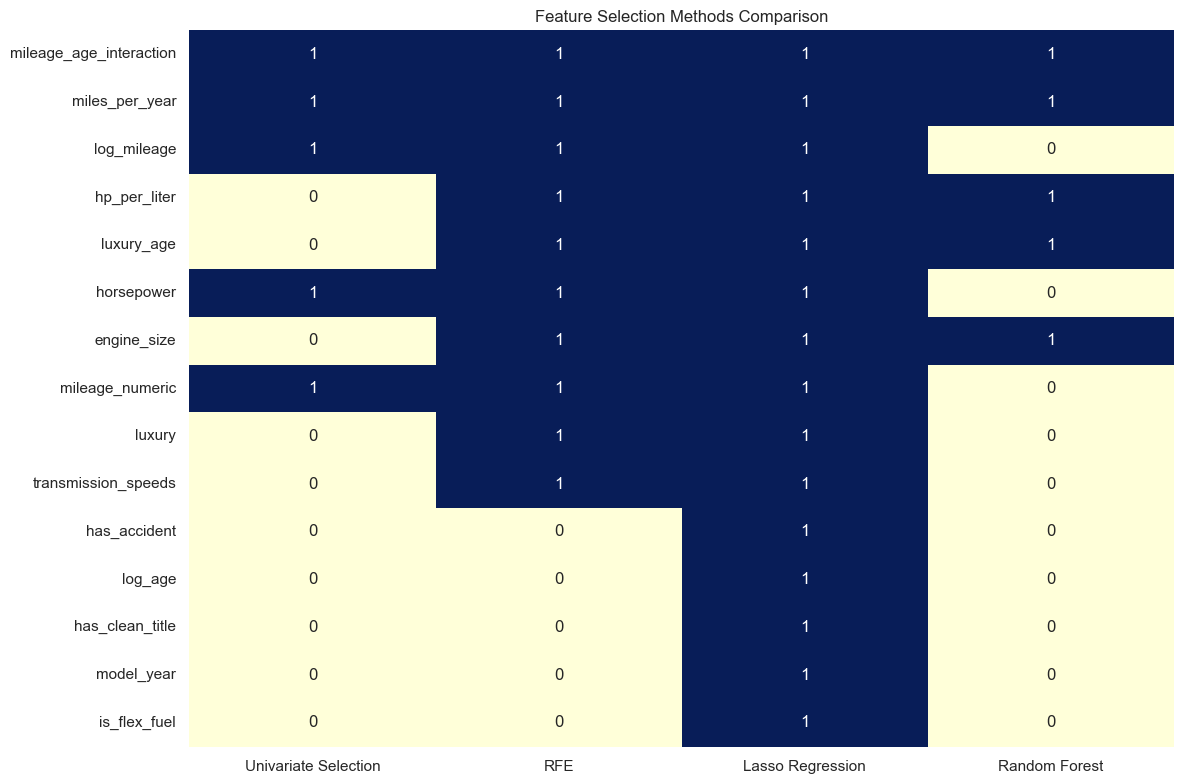

In [38]:
#Comparing Feature Selection Methods
methods = {
    'Univariate Selection': selected_features_uni,
    'RFE': selected_features_rfe,
    'Lasso Regression': selected_features_lasso,
    'Random Forest': selected_features_rf
}

# Create a comparison DataFrame
comparison = pd.DataFrame(index=X.columns)

for method_name, selected in methods.items():
    comparison[method_name] = [1 if feature in selected else 0 for feature in X.columns]

# Add a column for the sum (how many methods selected each feature)
comparison['Total'] = comparison.sum(axis=1)
comparison = comparison.sort_values('Total', ascending=False)

print("Feature selection method comparison:")
print(comparison)

# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(comparison.iloc[:, :-1], cmap='YlGnBu', annot=True, cbar=False)
plt.title('Feature Selection Methods Comparison')
plt.tight_layout()

In [39]:
# Select the features that were chosen by at least 2 methods
best_features = comparison[comparison['Total'] >= 2].index.tolist()
print(f"Final selected features: {best_features}")
print(f"Number of selected features: {len(best_features)}")

# Create the final feature set
X_final = X[best_features]

Final selected features: ['mileage_age_interaction', 'miles_per_year', 'log_mileage', 'hp_per_liter', 'luxury_age', 'horsepower', 'engine_size', 'mileage_numeric', 'luxury', 'transmission_speeds']
Number of selected features: 10


# Feature Importance Analysis

In [40]:
# Split data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Random Forest Feature Importances:
                    Feature  Importance
10              engine_size    0.216942
0               log_mileage    0.141248
8   mileage_age_interaction    0.118692
13          mileage_numeric    0.117486
14           miles_per_year    0.108152
1                horsepower    0.078894
9                luxury_age    0.073239
7              hp_per_liter    0.070776
2                    luxury    0.029289
6       transmission_speeds    0.013474
5                   log_age    0.011323
12               model_year    0.010595
4           has_clean_title    0.008968
3              has_accident    0.000784
11             is_flex_fuel    0.000139


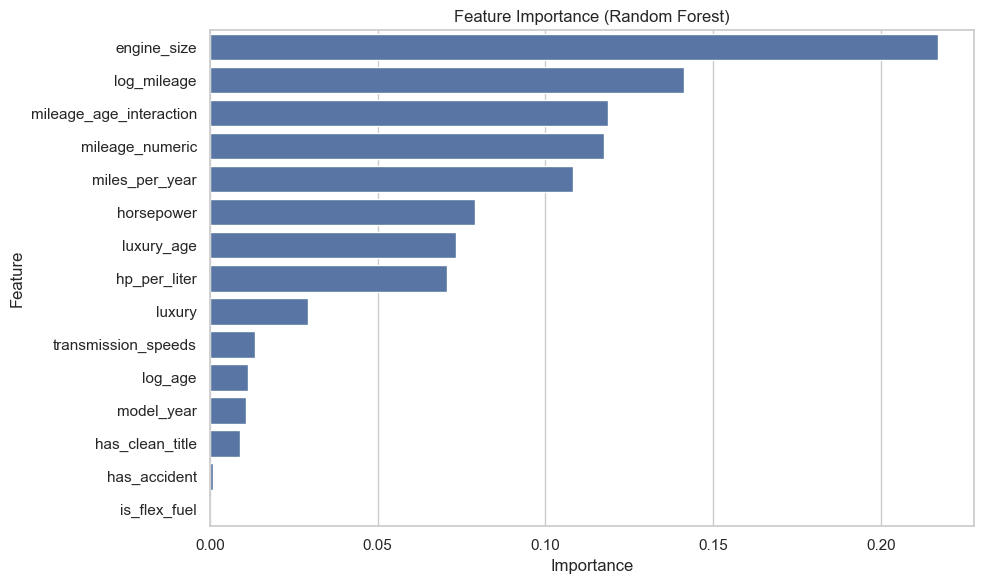

In [41]:
# 1. Random Forest feature importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
rf_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Random Forest Feature Importances:")
print(rf_importances)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importances)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()

Gradient Boosting Feature Importances:
                    Feature  Importance
10              engine_size    0.238832
13          mileage_numeric    0.180325
8   mileage_age_interaction    0.111848
14           miles_per_year    0.103405
9                luxury_age    0.092166
1                horsepower    0.074542
7              hp_per_liter    0.071692
0               log_mileage    0.059522
2                    luxury    0.051068
5                   log_age    0.007394
12               model_year    0.004508
6       transmission_speeds    0.003027
4           has_clean_title    0.001308
3              has_accident    0.000363
11             is_flex_fuel    0.000000


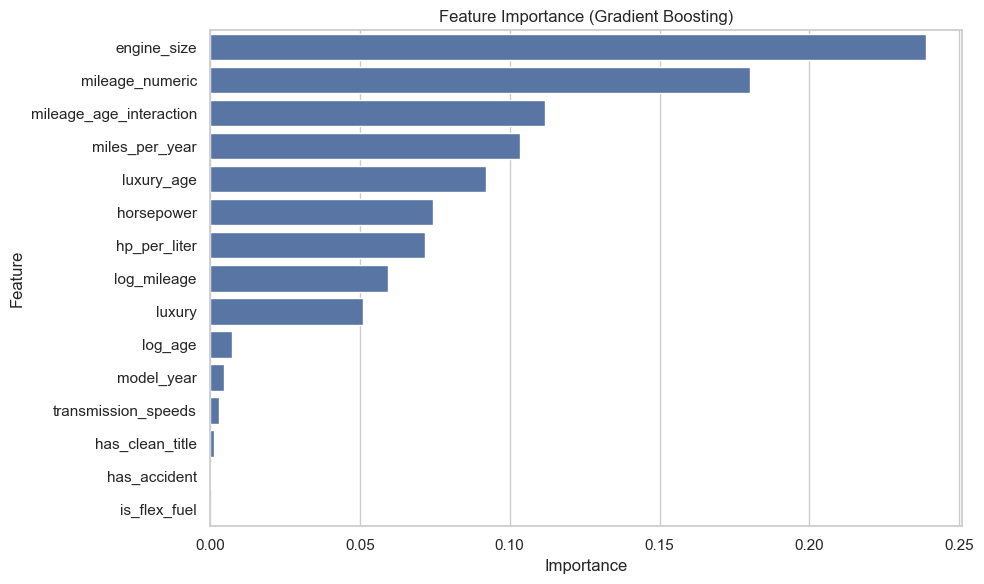

In [42]:
# 2. Gradient Boosting feature importance
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Get feature importances
gb_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Gradient Boosting Feature Importances:")
print(gb_importances)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_importances)
plt.title('Feature Importance (Gradient Boosting)')
plt.tight_layout()

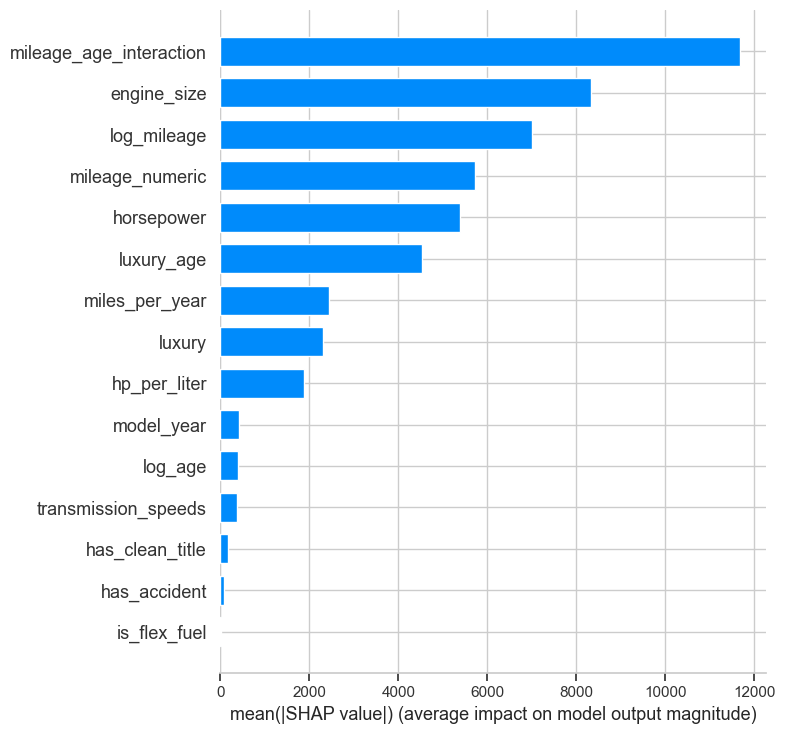

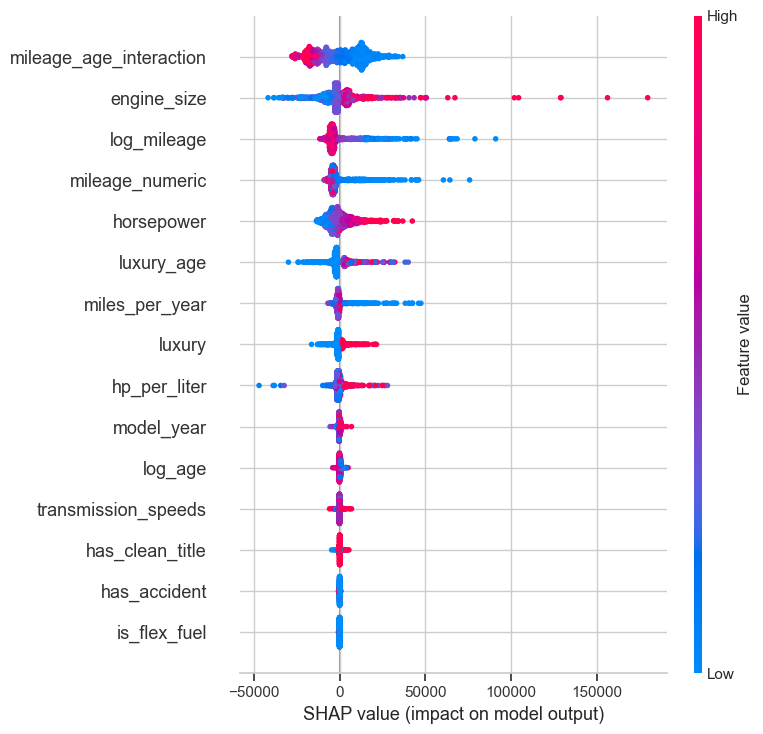

In [43]:
# SHAP analysis
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Detailed SHAP plot showing feature impacts
shap.summary_plot(shap_values, X_test)


# Feature Importance Stability Analysis

Feature Importance Stability Metrics:
                             mean       std       min       max  \
Feature                                                           
engine_size              0.217431  0.035422  0.171982  0.301886   
mileage_numeric          0.128523  0.030910  0.060615  0.174005   
miles_per_year           0.125373  0.053559  0.065071  0.252513   
mileage_age_interaction  0.124210  0.012943  0.089528  0.139393   
log_mileage              0.120834  0.028953  0.067646  0.180540   
luxury_age               0.083267  0.030490  0.045040  0.154568   
horsepower               0.078128  0.016664  0.057784  0.128101   
hp_per_liter             0.047339  0.013507  0.026878  0.085519   
luxury                   0.029356  0.014660  0.004240  0.053996   
transmission_speeds      0.014919  0.005836  0.006953  0.033179   
log_age                  0.010627  0.002808  0.006218  0.016355   
model_year               0.010574  0.002278  0.005901  0.014449   
has_clean_title         

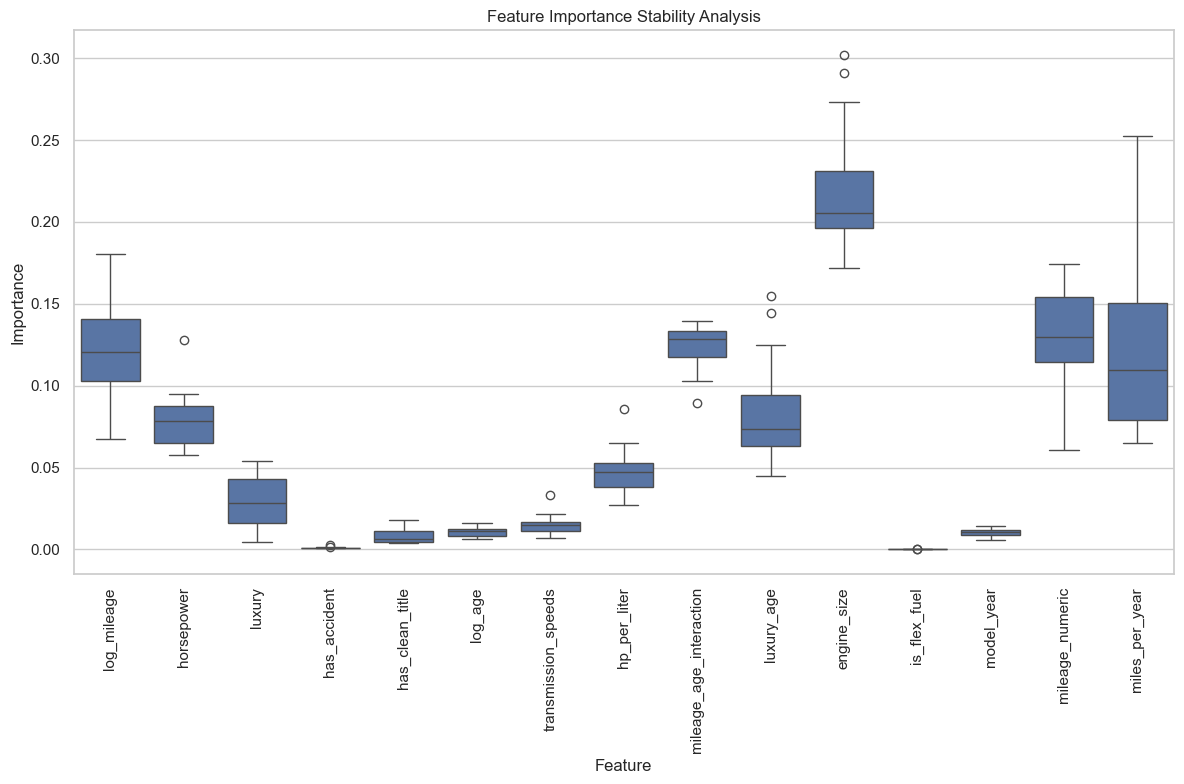

In [44]:
# Stability analysis using bootstrapping
n_iterations = 20
importances = []
np.random.seed(42)

for i in range(n_iterations):
    # Bootstrap sample
    indices = np.random.choice(range(len(X_train)), size=len(X_train), replace=True)
    X_boot = X_train.iloc[indices]
    y_boot = y_train.iloc[indices]
    
    # Fit model
    model = RandomForestRegressor(n_estimators=50, random_state=i)
    model.fit(X_boot, y_boot)
    
    # Store importances
    imp = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': model.feature_importances_
    })
    imp['Iteration'] = i
    importances.append(imp)

# Combine results
all_importances = pd.concat(importances)

# Visualize stability
plt.figure(figsize=(12, 8))
sns.boxplot(x='Feature', y='Importance', data=all_importances)
plt.title('Feature Importance Stability Analysis')
plt.xticks(rotation=90)
plt.tight_layout()

# Calculate stability metrics
importance_stats = all_importances.groupby('Feature')['Importance'].agg(['mean', 'std', 'min', 'max'])
importance_stats['coefficient_of_variation'] = importance_stats['std'] / importance_stats['mean']
importance_stats = importance_stats.sort_values('mean', ascending=False)

print("Feature Importance Stability Metrics:")
print(importance_stats)

Feature Importance Across Different Methods (Normalized):
                         RandomForest  GradientBoosting      SHAP   Average
engine_size                  1.000000          1.000000  0.713606  0.904535
mileage_age_interaction      0.547114          0.468313  1.000000  0.671809
mileage_numeric              0.541555          0.755028  0.490721  0.595768
log_mileage                  0.651085          0.249221  0.599142  0.499816
miles_per_year               0.498529          0.432960  0.209920  0.380469
horsepower                   0.363665          0.312112  0.460454  0.378744
luxury_age                   0.337595          0.385905  0.387582  0.370361
hp_per_liter                 0.326244          0.300178  0.161230  0.262550
luxury                       0.135009          0.213825  0.198498  0.182444
log_age                      0.052192          0.030959  0.035022  0.039391
transmission_speeds          0.062108          0.012675  0.032623  0.035802
model_year                   0

<Figure size 1200x800 with 0 Axes>

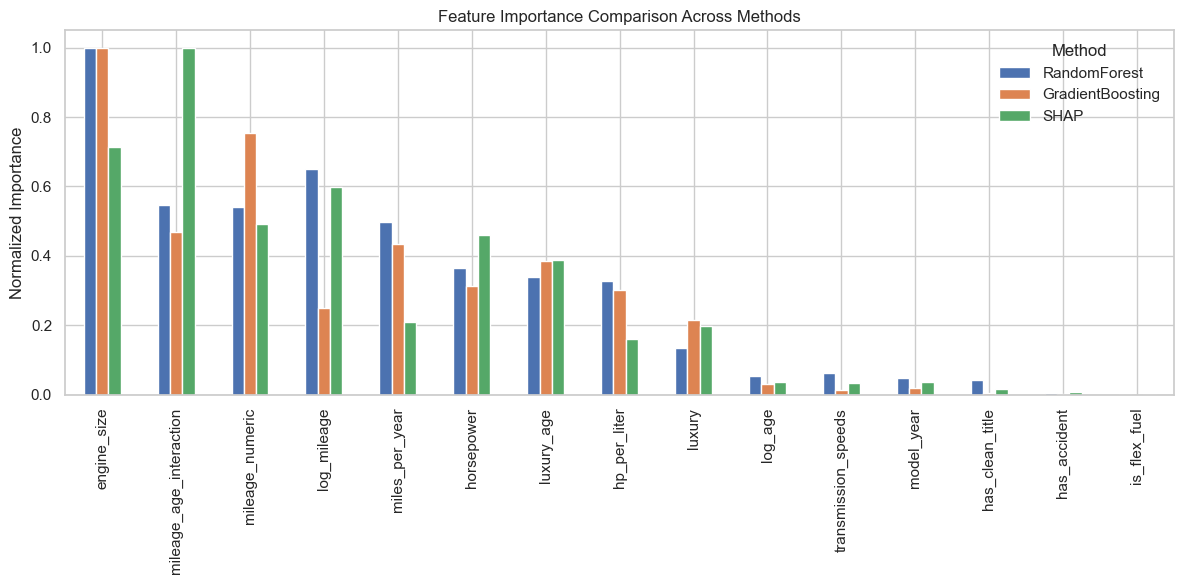

In [45]:
# Combine and compare different importance methods
comparison = pd.DataFrame(index=X_train.columns)

# Add normalized importance from different methods
comparison['RandomForest'] = rf_importances.set_index('Feature')['Importance']
comparison['GradientBoosting'] = gb_importances.set_index('Feature')['Importance']

# Add SHAP
shap_importance = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': np.abs(shap_values).mean(0)
})
comparison['SHAP'] = shap_importance.set_index('Feature')['Importance']

# Normalize each method (0-1 scale)
for col in comparison.columns:
    comparison[col] = comparison[col] / comparison[col].max()

# Calculate average importance across methods
comparison['Average'] = comparison.mean(axis=1)
comparison = comparison.sort_values('Average', ascending=False)

print("Feature Importance Across Different Methods (Normalized):")
print(comparison)

# Visualization
plt.figure(figsize=(12, 8))
comparison.iloc[:, :-1].plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance Comparison Across Methods')
plt.ylabel('Normalized Importance')
plt.legend(title='Method')
plt.tight_layout()